<a href="https://colab.research.google.com/github/matyi101/stats/blob/main/Forecasting_on_Auto_Loan_Application_at_Conventional_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting on Auto Loan Application at Conventional Banking

In [ ]:
!pip install pystan
!pip install fbprophet

In [ ]:
import os
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from fbprophet import Prophet
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.colors as mcolors
import scipy.stats as stats
sns.set()

plt.style.use('fivethirtyeight')

In [ ]:
url = 'https://raw.githubusercontent.com/matyi101/stats/main/commercial_loan.csv'
df = pd.read_csv(url)
df

,date,vehicle,property,personal,credit card,consumer loan
0,2011-01-01,4590.9,10407.9,1700.2,2270.6,1.5
1,2011-02-01,3261.3,8300.9,1250.8,1408.7,7.3
2,2011-03-01,5747.1,14786.5,2213.5,2517.4,7.4
3,2011-04-01,4920.2,13636.8,1954.3,2004.4,53.1
4,2011-05-01,4662.7,13978.3,2132.9,1833.4,1.7
...,...,...,...,...,...,...
115,2020-08-01,3361.5,15604.8,3236.0,2684.5,0.0
116,2020-09-01,3641.5,17898.8,3276.5,2408.7,0.0
117,2020-10-01,3356.0,16671.3,3059.7,2588.5,0.0
118,2020-11-01,3534.4,14337.4,3109.1,2654.7,0.0


In [ ]:
df = df[["date","vehicle"]] 
df = df.rename(columns = {"date":"ds","vehicle":"y"}) 

df.head(5)

,ds,y
0,2011-01-01,4590.9
1,2011-02-01,3261.3
2,2011-03-01,5747.1
3,2011-04-01,4920.2
4,2011-05-01,4662.7


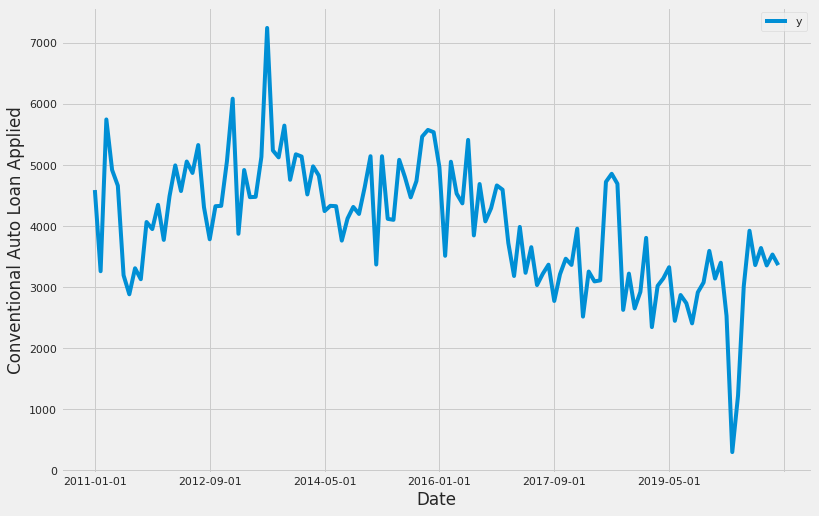

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Conventional Auto Loan Applied')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
151,2023-08-01
152,2023-09-01
153,2023-10-01
154,2023-11-01
155,2023-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2023-08-01,1722.899612,436.526803,3056.886255
152,2023-09-01,1380.504488,126.849318,2642.050579
153,2023-10-01,1886.634645,525.015173,3319.407350
154,2023-11-01,1757.375338,488.594028,3264.053796
155,2023-12-01,1959.697402,704.264583,3215.765846


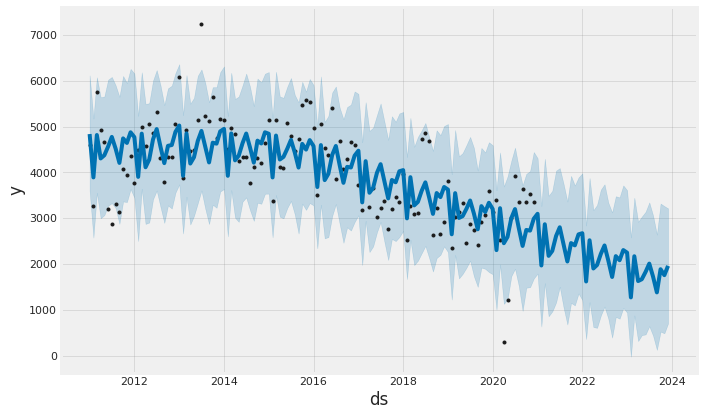

In [ ]:
my_model.plot(forecast,uncertainty=True);

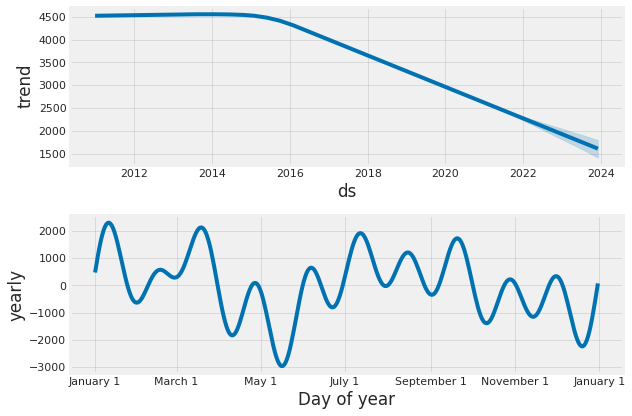

In [ ]:
my_model.plot_components(forecast);